In [1]:
%load_ext rpy2.ipython


In [2]:
import pandas as pd
import scipy.io as io
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.pylab as pylab
import numpy as np
from matplotlib import gridspec
import seaborn as sns
import datetime
from datetime import datetime, timedelta
import pickle
import itertools
import glob

In [3]:
import rpy2.robjects as robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri

In [4]:
import matplotlib.dates as dates
from scipy import stats
from scipy.stats import variation
from scipy.stats import skewnorm
import math
from scipy.signal import butter, filtfilt
import itertools

In [5]:
import matplotlib.pyplot as plt
#font = {'family': 'serif', 'serif': ['Palatino']}
font = {'family': 'serif', 'serif': ['Helvetica']}
plt.rc('font', **font)
plt.rc('text', usetex=False)

In [6]:
label_fontsize = 16
title_fontsize = 16

In [7]:
#Set up parameters for figure display
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (8, 8),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'axes.labelweight': 'bold',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}

pylab.rcParams.update(params)
pylab.rcParams["font.family"] = "serif"
pylab.rcParams["font.weight"] = "heavy"
#pylab.rcParams.update({'figure.autolayout': True})

In [8]:
sns.set(font_scale=1.25, style="whitegrid")

In [9]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [10]:
%%R
install.packages("tidyverse")
install.packages("lme4")
#install.packages("lmerTestR")
install.packages("afex")
install.packages("ggplot2")
install.packages("sdamr")
install.packages("Matrix")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/tidyverse_2.0.0.tar.gz'
Content type 'application/x-gzip' length 704618 bytes (688 KB)
downloaded 688 KB


The downloaded source packages are in
	‘/tmp/RtmpQVHc47/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘rbibutils’, ‘minqa’, ‘nloptr’, ‘reformulas’, ‘Rdpack’, ‘RcppEigen’

trying URL 'https://cran.rstudio.com/src/contrib/rbibutils_2.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/minqa_1.2.8.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/nloptr_2.2.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/reformulas_0.4.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/Rdpack_2.6.4.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/RcppEigen_0.3.4.0.2.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/lme4_1.1-38.tar.gz'



In [11]:
%%R
install.packages("devtools")


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/devtools_2.4.6.tar.gz'
Content type 'application/x-gzip' length 396751 bytes (387 KB)
downloaded 387 KB


The downloaded source packages are in
	‘/tmp/RtmpQVHc47/downloaded_packages’


In [12]:
%%R
# Alternatively, install just readr:
install.packages("readr")
install.packages("emmeans")
install.packages("BayesFactor", repos='http://cran.us.r-project.org')
install.packages("MuMIn")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/readr_2.1.6.tar.gz'
Content type 'application/x-gzip' length 299193 bytes (292 KB)
downloaded 292 KB


The downloaded source packages are in
	‘/tmp/RtmpQVHc47/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘estimability’, ‘mvtnorm’

trying URL 'https://cran.rstudio.com/src/contrib/estimability_1.5.1.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/mvtnorm_1.3-3.tar.gz'
trying URL 'https://cran.rstudio.com/src/contrib/emmeans_2.0.0.tar.gz'

The downloaded source packages are in
	‘/tmp/RtmpQVHc47/downloaded_packages’
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘elliptic’, ‘contfrac’, ‘deSolve’, ‘coda’, ‘pbapply’, ‘hypergeo’

trying URL 'http://cran.us.r-project.org/src/contrib/elliptic_1.5-1.ta

In [13]:
%%R
#plot
rm(list = ls())  #remove elements from current workspace
library(lme4)
library(ggplot2)
library(tidyverse)
library(Matrix)
#library(lmerTest)
library(sdamr)
library(afex)
#library(readr)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ lubridate 1.9.4     ✔ tibble    3.3.0
✔ purrr     1.2.0     ✔ tidyr     1.3.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ tidyr::expand() masks Matrix::expand()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
✖ tidyr::pack()   masks Matrix::pack()
✖ tidyr::unpack() masks Matrix::unpack()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: Matrix
************
Welcome to afex. For support visit: http://afex.singmann.science/
- Functions for ANOVAs: aov_car(), aov_ez(), and aov_4()
- Methods for calculating p-values with mixed(): 'S', 'KR', 'LRT', and 'PB'
- 'afex_aov' and 'mixed' objects can be passed to emmeans() for follow-up tests
- Get and set global package options with: afex_options()
- Set sum-to-zero contrasts globally: set_sum_contrasts()
- For example analyses see: browseVignettes("afex")
************

Attaching package: ‘afex’

The following object is masked from ‘package:lme4’:

    lmer



In [14]:
%%R
library("plyr")
library("emmeans")
library("reshape2")
library("multcomp")
library("MuMIn")
library("BayesFactor")

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Error in library("multcomp") : there is no package called ‘multcomp’


RInterpreterError: Failed to parse and evaluate line 'library("plyr")\nlibrary("emmeans")\nlibrary("reshape2")\nlibrary("multcomp")\nlibrary("MuMIn")\nlibrary("BayesFactor")\n'.
R error message: 'Error in library("multcomp") : there is no package called ‘multcomp’'
R stdout:
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Attaching package: ‘reshape2’

The following object is masked from ‘package:tidyr’:

    smiths

Error in library("multcomp") : there is no package called ‘multcomp’

In [15]:
%%R
base_dir='/content/gdrive/MyDrive/Mutual_Information/Colab_Notebooks/conflict_all_RT/'
beh_files = "beh_data/csv_files/"
output_dir = "figures/"
csv_file = paste(base_dir,beh_files,"CPP_slopes_long_WRSD.csv",sep="")
csv_file


[1] "/content/gdrive/MyDrive/Mutual_Information/Colab_Notebooks/conflict_all_RT/beh_data/csv_files/CPP_slopes_long_WRSD.csv"


In [32]:

%%R
CPP_data = read_csv(csv_file)
# Definir nombres de las columnas para RT_data
colnames(CPP_data) <- c("ID", "Sleep", "State", "Congruency","Slope")

Rows: 232 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Subject, Sleep, State, Congruency
dbl (1): Slope

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [33]:
%%R
CPP_data

# A tibble: 232 × 5
   ID    Sleep State Congruency Slope
   <chr> <chr> <chr> <chr>      <dbl>
 1 002   WR    Alert Congruent   7.17
 2 004   WR    Alert Congruent  17.8 
 3 005   WR    Alert Congruent  12.8 
 4 009   WR    Alert Congruent   1.77
 5 010   WR    Alert Congruent   5.78
 6 013   WR    Alert Congruent   8.37
 7 016   WR    Alert Congruent  -4.69
 8 018   WR    Alert Congruent  10.5 
 9 019   WR    Alert Congruent   3.72
10 020   WR    Alert Congruent   6.56
# ℹ 222 more rows
# ℹ Use `print(n = ...)` to see more rows


In [30]:
%%R

CPP_data$State<-factor(CPP_data$State, levels=c("1","2"), labels=c("Alert","Drowsy"))
CPP_data$Congruency<-factor(CPP_data$Congruency, levels=c("1","2"), labels=c("Congruent","Incongruent"))
CPP_data$Sleep<-factor(CPP_data$Sleep, levels=c("1","2"), labels=c("WR","SD"))
CPP_data$ID <- as.factor(CPP_data$ID)

In [31]:
%%R
CPP_data


# A tibble: 232 × 5
   ID    Sleep State Congruency Slope
   <fct> <fct> <fct> <fct>      <dbl>
 1 002   <NA>  <NA>  <NA>        7.17
 2 004   <NA>  <NA>  <NA>       17.8 
 3 005   <NA>  <NA>  <NA>       12.8 
 4 009   <NA>  <NA>  <NA>        1.77
 5 010   <NA>  <NA>  <NA>        5.78
 6 013   <NA>  <NA>  <NA>        8.37
 7 016   <NA>  <NA>  <NA>       -4.69
 8 018   <NA>  <NA>  <NA>       10.5 
 9 019   <NA>  <NA>  <NA>        3.72
10 020   <NA>  <NA>  <NA>        6.56
# ℹ 222 more rows
# ℹ Use `print(n = ...)` to see more rows


In [24]:
%%R
install.packages("dplyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.1.4.tar.gz'
Content type 'application/x-gzip' length 1207521 bytes (1.2 MB)
downloaded 1.2 MB


The downloaded source packages are in
	‘/tmp/RtmpQVHc47/downloaded_packages’


In [34]:
%%R
library(dplyr)

# Número de IDs únicos
n_subj <- CPP_data %>% summarise(n = n_distinct(ID))
print(n_subj)


   n
1 43


In [35]:
%%R
# usa dplyr con namespace explícito para evitar choques con plyr
subj_sleep <- CPP_data %>%
  dplyr::group_by(ID) %>%
  dplyr::summarise(
    has_WR = any(Sleep == "WR", na.rm = TRUE),
    has_SD = any(Sleep == "SD", na.rm = TRUE),
    .groups = "drop"
  ) %>%
  dplyr::mutate(
    group = dplyr::case_when(
      has_WR & !has_SD ~ "Only_WR",
      !has_WR & has_SD ~ "Only_SD",
      has_WR &  has_SD ~ "WR_and_SD",
      TRUE              ~ "Other"
    )
  )

# Conteo por grupo (sin count/rename)
counts <- as.data.frame(table(subj_sleep$group))
names(counts) <- c("group", "n_subjects")
counts <- counts[order(-counts$n_subjects), ]
print(counts)

# IDs por grupo (sin pull)
WR_only_IDs <- subset(subj_sleep, group == "Only_WR")[["ID"]]
SD_only_IDs <- subset(subj_sleep, group == "Only_SD")[["ID"]]
WR_SD_IDs   <- subset(subj_sleep, group == "WR_and_SD")[["ID"]]


      group n_subjects
3 WR_and_SD         24
1   Only_SD         10
2   Only_WR          9


In [36]:
%%R
# Ver los IDs de cada grupo
WR_only_IDs

[1] "003" "005" "010" "013" "036" "047" "048" "049" "053"


In [37]:
%%R
# Ver los IDs de cada grupo
SD_only_IDs

 [1] "001" "008" "012" "015" "017" "029" "035" "037" "038" "042"


In [38]:
%%R
# Ver los IDs de cada grupo
WR_SD_IDs


 [1] "002" "004" "009" "016" "018" "019" "020" "021" "022" "023" "024" "025"
[13] "026" "027" "028" "030" "031" "032" "039" "040" "041" "050" "051" "052"


In [ ]:
#Model comparison
#define models

In [39]:
###############################
# anova null vs state
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
#state model
state.model <- lmer(Slope ~ State + (1|ID), data=CPP_data, REML=FALSE)

anova(null.model, state.model)


Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
state.model: Slope ~ State + (1 | ID)
            npar    AIC    BIC  logLik -2*log(L)  Chisq Df Pr(>Chisq)    
null.model     3 1357.6 1367.9 -675.79    1351.6                         
state.model    4 1280.7 1294.5 -636.34    1272.7 78.893  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


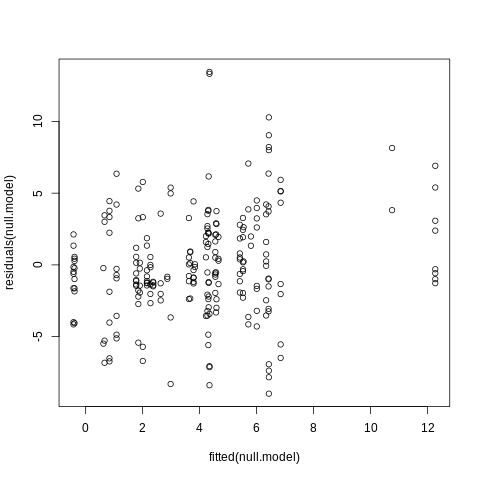

In [40]:
%%R
plot(fitted(null.model),residuals(null.model))

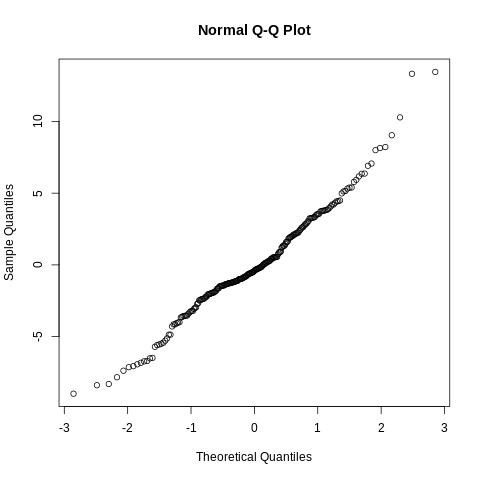

In [41]:
%%R
hist(residuals(null.model))
qqnorm(residuals(null.model))

In [42]:
###############################
# anova null vs congruency
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
#congruency model
congruency.model <- lmer(Slope ~ Congruency + (1|ID), data=CPP_data, REML=FALSE)

anova(null.model, congruency.model)

Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
congruency.model: Slope ~ Congruency + (1 | ID)
                 npar    AIC    BIC  logLik -2*log(L)  Chisq Df Pr(>Chisq)
null.model          3 1357.6 1367.9 -675.79    1351.6                     
congruency.model    4 1359.0 1372.8 -675.49    1351.0 0.5876  1     0.4434


In [44]:
#######
# anova null vs sleep
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
# sleep model
sleep.model<- lmer(Slope ~ Sleep +(1|ID), data=CPP_data, REML=FALSE)
anova(null.model,sleep.model)

Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
sleep.model: Slope ~ Sleep + (1 | ID)
            npar    AIC    BIC  logLik -2*log(L)  Chisq Df Pr(>Chisq)
null.model     3 1357.6 1367.9 -675.79    1351.6                     
sleep.model    4 1359.5 1373.3 -675.77    1351.5 0.0353  1      0.851


In [47]:
#######
# State:Congruency
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
state.congruency.model<- lmer(Slope ~ State* Congruency +(1|ID), data=CPP_data, REML=FALSE)
anova(null.model,state.congruency.model)


Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
state.congruency.model: Slope ~ State * Congruency + (1 | ID)
                       npar    AIC    BIC  logLik -2*log(L) Chisq Df Pr(>Chisq)
null.model                3 1357.6 1367.9 -675.79    1351.6                    
state.congruency.model    6 1283.6 1304.3 -635.80    1271.6 79.98  3  < 2.2e-16
                          
null.model                
state.congruency.model ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [49]:
#######
# State:Congruency:sleep
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
state.congruency.sleep.model<- lmer(Slope ~ State * Congruency*Sleep +(1|ID), data=CPP_data, REML=FALSE)
anova(null.model,state.congruency.sleep.model)

Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
state.congruency.sleep.model: Slope ~ State * Congruency * Sleep + (1 | ID)
                             npar    AIC    BIC  logLik -2*log(L)  Chisq Df
null.model                      3 1357.6 1367.9 -675.79    1351.6          
state.congruency.sleep.model   10 1291.2 1325.6 -635.58    1271.2 80.417  7
                             Pr(>Chisq)    
null.model                                 
state.congruency.sleep.model  1.133e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [50]:
#######
# State:.sleep
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
state.sleep.model<- lmer(Slope ~ State*Sleep +(1|ID), data=CPP_data, REML=FALSE)
anova(null.model,state.sleep.model)

Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
state.sleep.model: Slope ~ State * Sleep + (1 | ID)
                  npar    AIC    BIC  logLik -2*log(L)  Chisq Df Pr(>Chisq)    
null.model           3 1357.6 1367.9 -675.79    1351.6                         
state.sleep.model    6 1284.4 1305.1 -636.21    1272.4 79.154  3  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [51]:
#######
# Congruency.sleep
%%R
# null model
null.model <- lmer(Slope ~ 1+ (1|ID), data=CPP_data, REML=FALSE)
congruency.sleep.model<- lmer(Slope ~ Congruency*Sleep +(1|ID), data=CPP_data, REML=FALSE)
anova(null.model,congruency.sleep.model)

Data: CPP_data
Models:
null.model: Slope ~ 1 + (1 | ID)
congruency.sleep.model: Slope ~ Congruency * Sleep + (1 | ID)
                       npar    AIC    BIC  logLik -2*log(L)  Chisq Df
null.model                3 1357.6 1367.9 -675.79    1351.6          
congruency.sleep.model    6 1362.9 1383.6 -675.45    1350.9 0.6789  3
                       Pr(>Chisq)
null.model                       
congruency.sleep.model     0.8781


In [52]:
#the above analysis show that the state.congruency.sleep.model is the most likely model..
## TABLE 2.
%%R
library(afex)
state.congruency.sleep.model <- mixed(Slope ~ State * Congruency * Sleep + (1 |ID), data=CPP_data, check_contrasts = FALSE, test_intercept = TRUE, method="S")
state.congruency.sleep.model

Fitting one lmer() model. [DONE]
Calculating p-values. [DONE]
Mixed Model Anova Table (Type 3 tests, S-method)

Model: Slope ~ State * Congruency * Sleep + (1 | ID)
Data: CPP_data
                  Effect        df         F p.value
1                  State 1, 194.41 93.99 ***   <.001
2             Congruency 1, 182.46      0.86    .355
3                  Sleep 1, 207.48      0.07    .792
4       State:Congruency 1, 182.46      0.19    .667
5            State:Sleep 1, 191.62      0.17    .682
6       Congruency:Sleep 1, 182.46      0.08    .781
7 State:Congruency:Sleep 1, 182.46      0.10    .754
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘+’ 0.1 ‘ ’ 1


In addition: Warning message:
In mixed(Slope ~ State * Congruency * Sleep + (1 | ID), data = CPP_data,  :
  Cannot test intercept with Satterthwaite approximation.


In [53]:
%%R
summary(state.congruency.sleep.model)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Slope ~ State * Congruency * Sleep + (1 | ID)
   Data: data

REML criterion at convergence: 1262.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2721 -0.5982  0.0456  0.5728  3.3361 

Random effects:
 Groups   Name        Variance Std.Dev.
 ID       (Intercept)  9.598   3.098   
 Residual             10.619   3.259   
Number of obs: 232, groups:  ID, 43

Fixed effects:
                                          Estimate Std. Error       df t value
(Intercept)                                 6.3276     0.8178 158.8901   7.737
StateDrowsy                                -4.2219     0.8778 187.6944  -4.810
CongruencyIncongruent                      -0.3287     0.9038 182.4647  -0.364
SleepWR                                     0.3091     0.9175 193.1105   0.337
StateDrowsy:CongruencyIncongruent           0.1003     1.2168 182.4647   0.082
StateDrowsy:SleepWR                      

In [54]:
%%R
print(anova(state.congruency.sleep.model))

Mixed Model Anova Table (Type 3 tests, S-method)

Model: Slope ~ State * Congruency * Sleep + (1 | ID)
Data: CPP_data
                       num Df den Df       F Pr(>F)    
State                       1 194.41 93.9912 <2e-16 ***
Congruency                  1 182.46  0.8608 0.3547    
Sleep                       1 207.48  0.0699 0.7918    
State:Congruency            1 182.46  0.1855 0.6672    
State:Sleep                 1 191.62  0.1679 0.6825    
Congruency:Sleep            1 182.46  0.0776 0.7808    
State:Congruency:Sleep      1 182.46  0.0985 0.7540    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
